This document is an introductory walkthrough, demonstrating how to read into Python some OMOP data from a series of csv files, join on concept names and explore and visualise the data.

It uses synthetic data created in UCLH as a part of the  [Critical Care Health Informatics Collaborative (CCHIC) project](https://safehr-data.github.io/uclh-research-discovery/projects/uclh_cchic_s0/index.html).

# Installing & loading required packages
1. ### pip install pandas

2. ### pip install seaborn

3. ### pip install matplotlib


In [3]:
import os
import requests
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from pathlib import Path

# Downloading & reading in OMOP data
Here we will download & read in some UCLH critical care data stored in Github

In [5]:
# Repository and file paths
repository = "SAFEHR-data/uclh-research-discovery"
source_path = "_projects/uclh_cchic_s0/data"

# Define destination folder dynamically 
destination_folder = Path().resolve() / "data"

# Create destination folder if it doesn't exist
destination_folder.mkdir(parents=True, exist_ok=True)

# GitHub API URL to get the contents of the folder
api_url = f"https://api.github.com/repos/{repository}/contents/{source_path}"

# Fetch the list of files from the GitHub folder
files = requests.get(api_url).json()

# Download each file
for file in files:
    file_url = file["download_url"]
    file_name = file["name"]
    file_path = destination_folder / file_name

    # Download and save the file
    print(f"Downloading {file_name}...")
    with open(file_path, "wb") as local_file:
        local_file.write(requests.get(file_url).content)

# List all downloaded files
print("Download complete! Files in the folder:")



Download complete! Files in the folder:


# Loading Multiple CSV Files into DataFrames
This script loads all CSV files from a specified folder into individual pandas DataFrames and stores them in a dictionary.

In [7]:
#########Load files in Data frames w.r.t file names
# store the loaded data from each CSV file.
cdm = {} 
for file in destination_folder.iterdir():
    if file.suffix == ".csv":  # Check file extension
        # Extract file name without extension
        file_name = file.stem
        # Load the file into a DataFrame
        cdm[file_name] = pd.read_csv(file)
        print(f"Loaded {file_name} into a DataFrame.")

Loaded observation_period into a DataFrame.
Loaded drug_exposure into a DataFrame.
Loaded specimen into a DataFrame.
Loaded death into a DataFrame.
Loaded device_exposure into a DataFrame.
Loaded measurement into a DataFrame.
Loaded condition_occurrence into a DataFrame.
Loaded visit_occurrence into a DataFrame.
Loaded person into a DataFrame.
Loaded observation into a DataFrame.
Loaded procedure_occurrence into a DataFrame.


In [8]:
for name in cdm.keys():
    print(name)


observation_period
drug_exposure
specimen
death
device_exposure
measurement
condition_occurrence
visit_occurrence
person
observation
procedure_occurrence


# Looking at the person table
The OMOP tables are stored as data frames within the list object & can be accessed by the table name.

Thus we can find the names of the columns in person, use df["person"].columns and df["person"].head() to preview the data and seaborn() plot some of them. Note that not all columns contain data and in that case are filled with NA.

In [10]:
# show column names for one of the tables
cdm['person'].columns

Index(['person_id', 'gender_concept_id', 'year_of_birth', 'month_of_birth',
       'day_of_birth', 'birth_datetime', 'race_concept_id',
       'ethnicity_concept_id', 'location_id', 'provider_id', 'care_site_id',
       'person_source_value', 'gender_source_value',
       'gender_source_concept_id', 'race_source_value',
       'race_source_concept_id', 'ethnicity_source_value',
       'ethnicity_source_concept_id'],
      dtype='object')

In [11]:
# show column datatype for one of the tables
cdm['person'].dtypes

person_id                        int64
gender_concept_id                int64
year_of_birth                    int64
month_of_birth                   int64
day_of_birth                     int64
birth_datetime                  object
race_concept_id                  int64
ethnicity_concept_id             int64
location_id                      int64
provider_id                    float64
care_site_id                   float64
person_source_value            float64
gender_source_value             object
gender_source_concept_id       float64
race_source_value              float64
race_source_concept_id         float64
ethnicity_source_value          object
ethnicity_source_concept_id    float64
dtype: object

In [12]:
# glimpse table data
cdm['person'].head() 

,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id,care_site_id,person_source_value,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id
0,2451,8532,1947,3,18,1947-03-18 11:34:00.221602,46285839,38003564,97,NaN,NaN,NaN,FEMALE,NaN,NaN,NaN,Not Hispanic or Latino,NaN
1,2452,8532,1945,1,2,1945-01-02 19:12:41.795667,46285825,38003564,92,NaN,NaN,NaN,FEMALE,NaN,NaN,NaN,Not Hispanic or Latino,NaN
2,2453,8507,1985,2,13,1985-02-13 09:53:37.14794,46286810,38003563,70,NaN,NaN,NaN,MALE,NaN,NaN,NaN,Hispanic or Latino,NaN
3,2454,8507,1948,11,22,1948-11-22 02:21:08.685898,46286810,38003563,32,NaN,NaN,NaN,MALE,NaN,NaN,NaN,Hispanic or Latino,NaN
4,2455,8507,1946,1,19,1946-01-19 04:41:57.006488,46286810,38003563,91,NaN,NaN,NaN,MALE,NaN,NaN,NaN,Hispanic or Latino,NaN


### plot some columns, patient birth years by gender

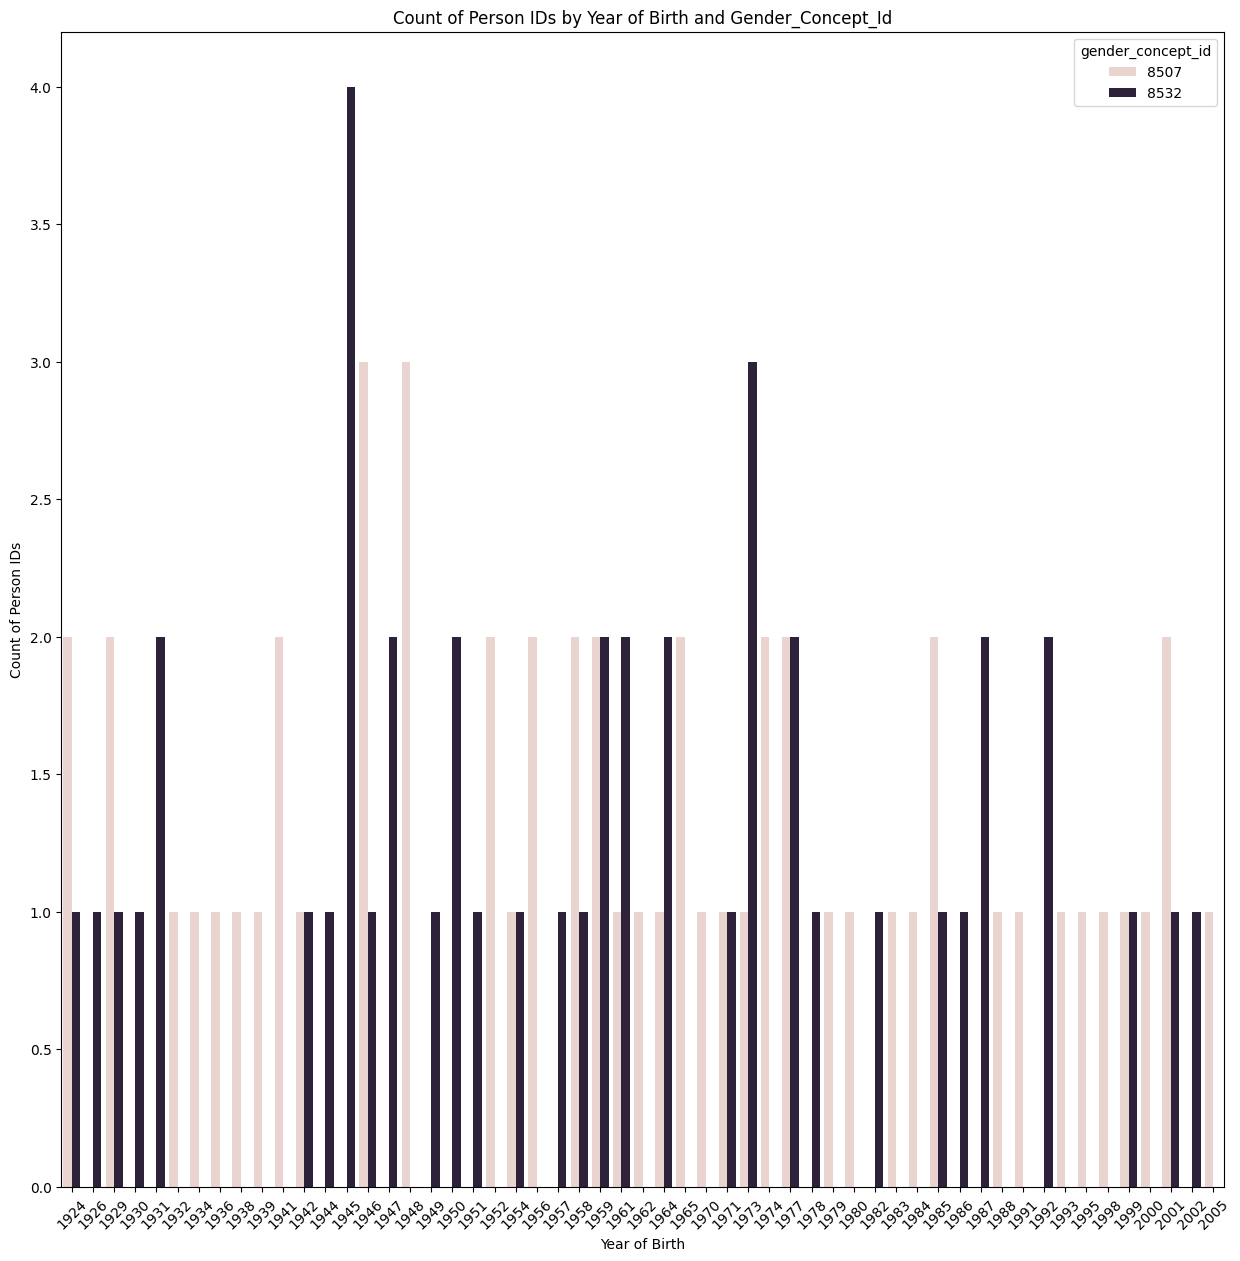

In [14]:
birth_year_gender_cnt = cdm['person'].groupby(['year_of_birth', 'gender_concept_id'])['person_id'].count().reset_index()

# Rename the 'person_id' column to 'count'
birth_year_gender_cnt.rename(columns={'person_id': 'count'}, inplace=True)

# Set the figure size (optional)
plt.figure(figsize=(15, 15))

# Create the plot
sns.barplot(x='year_of_birth', y='count', hue='gender_concept_id', data=birth_year_gender_cnt)

# Add title and labels
plt.title('Count of Person IDs by Year of Birth and Gender_Concept_Id')
plt.xlabel('Year of Birth')
plt.ylabel('Count of Person IDs')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In the plot above bars are coloured by gender_concept_id which is the OMOP ID for gender, but we don't actually know which is which. We will look at resolving that by retrieving OMOP concept names in the next section.

# OMOP Processed Vocabularies
Repository for pre-processed vocabularies for working with the OMOP CDM at UCLH.

You can download these files directly or follow the local development instructions to use git to clone the files

## Downloading versions
You can download a specific tagged version using https. in this format, replacing the curly braced values:

https://github.com/SAFEHR-data/omop-vocabs-processed/raw/refs/tags/{tag}/{relative_path}

## Getting names for OMOP concept IDs

In [17]:
import urllib.request

tag = "v4"
relative_path = "data/concept.parquet"
download_url = f"https://github.com/SAFEHR-data/omop-vocabs-processed/raw/refs/tags/{tag}/{relative_path}"
local_filename = destination_folder/"concept.parquet"

#urllib.request.urlretrieve(download_url, local_filename)

In [18]:
# Read the parquet file into a pandas DataFrame
cdm_concept = pd.read_parquet(local_filename)

# Display the first few rows of the DataFrame to ensure it's loaded
cdm_concept.head()

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
0,45756805,Pediatric Cardiology,Provider,ABMS,Physician Specialty,S,OMOP4821938,1970-01-01,2099-12-31,None
1,45756804,Pediatric Anesthesiology,Provider,ABMS,Physician Specialty,S,OMOP4821939,1970-01-01,2099-12-31,None
2,45756803,Pathology-Anatomic / Pathology-Clinical,Provider,ABMS,Physician Specialty,S,OMOP4821940,1970-01-01,2099-12-31,None
3,45756802,Pathology - Pediatric,Provider,ABMS,Physician Specialty,S,OMOP4821941,1970-01-01,2099-12-31,None
4,45756801,Pathology - Molecular Genetic,Provider,ABMS,Physician Specialty,S,OMOP4821942,1970-01-01,2099-12-31,None


In [19]:
cdm_person_concept = pd.merge(cdm['person'], cdm_concept, 
                             left_on='gender_concept_id', 
                             right_on='concept_id', 
                             how='left')

cdm_person_concept.head()

,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id,...,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
0,2451,8532,1947,3,18,1947-03-18 11:34:00.221602,46285839,38003564,97,NaN,...,8532,FEMALE,Gender,Gender,Gender,S,F,1970-01-01,2099-12-31,None
1,2452,8532,1945,1,2,1945-01-02 19:12:41.795667,46285825,38003564,92,NaN,...,8532,FEMALE,Gender,Gender,Gender,S,F,1970-01-01,2099-12-31,None
2,2453,8507,1985,2,13,1985-02-13 09:53:37.14794,46286810,38003563,70,NaN,...,8507,MALE,Gender,Gender,Gender,S,M,1970-01-01,2099-12-31,None
3,2454,8507,1948,11,22,1948-11-22 02:21:08.685898,46286810,38003563,32,NaN,...,8507,MALE,Gender,Gender,Gender,S,M,1970-01-01,2099-12-31,None
4,2455,8507,1946,1,19,1946-01-19 04:41:57.006488,46286810,38003563,91,NaN,...,8507,MALE,Gender,Gender,Gender,S,M,1970-01-01,2099-12-31,None


In [20]:
# Merge person data with the concept data, focusing only on gender_concept_id and concept_name
cdm_person_concept = pd.merge(
    cdm['person'], 
    cdm_concept[['concept_id', 'concept_name']],  # Only select 'concept_id' and 'concept_name'
    left_on='gender_concept_id', right_on='concept_id', 
    how='left'
)

# Rename the 'concept_name' column to 'gender_concept_name'
cdm_person_concept = cdm_person_concept.rename(columns={'concept_name': 'gender_concept_name'})

cdm_person_concept.head()


,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id,care_site_id,person_source_value,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id,concept_id,gender_concept_name
0,2451,8532,1947,3,18,1947-03-18 11:34:00.221602,46285839,38003564,97,NaN,NaN,NaN,FEMALE,NaN,NaN,NaN,Not Hispanic or Latino,NaN,8532,FEMALE
1,2452,8532,1945,1,2,1945-01-02 19:12:41.795667,46285825,38003564,92,NaN,NaN,NaN,FEMALE,NaN,NaN,NaN,Not Hispanic or Latino,NaN,8532,FEMALE
2,2453,8507,1985,2,13,1985-02-13 09:53:37.14794,46286810,38003563,70,NaN,NaN,NaN,MALE,NaN,NaN,NaN,Hispanic or Latino,NaN,8507,MALE
3,2454,8507,1948,11,22,1948-11-22 02:21:08.685898,46286810,38003563,32,NaN,NaN,NaN,MALE,NaN,NaN,NaN,Hispanic or Latino,NaN,8507,MALE
4,2455,8507,1946,1,19,1946-01-19 04:41:57.006488,46286810,38003563,91,NaN,NaN,NaN,MALE,NaN,NaN,NaN,Hispanic or Latino,NaN,8507,MALE


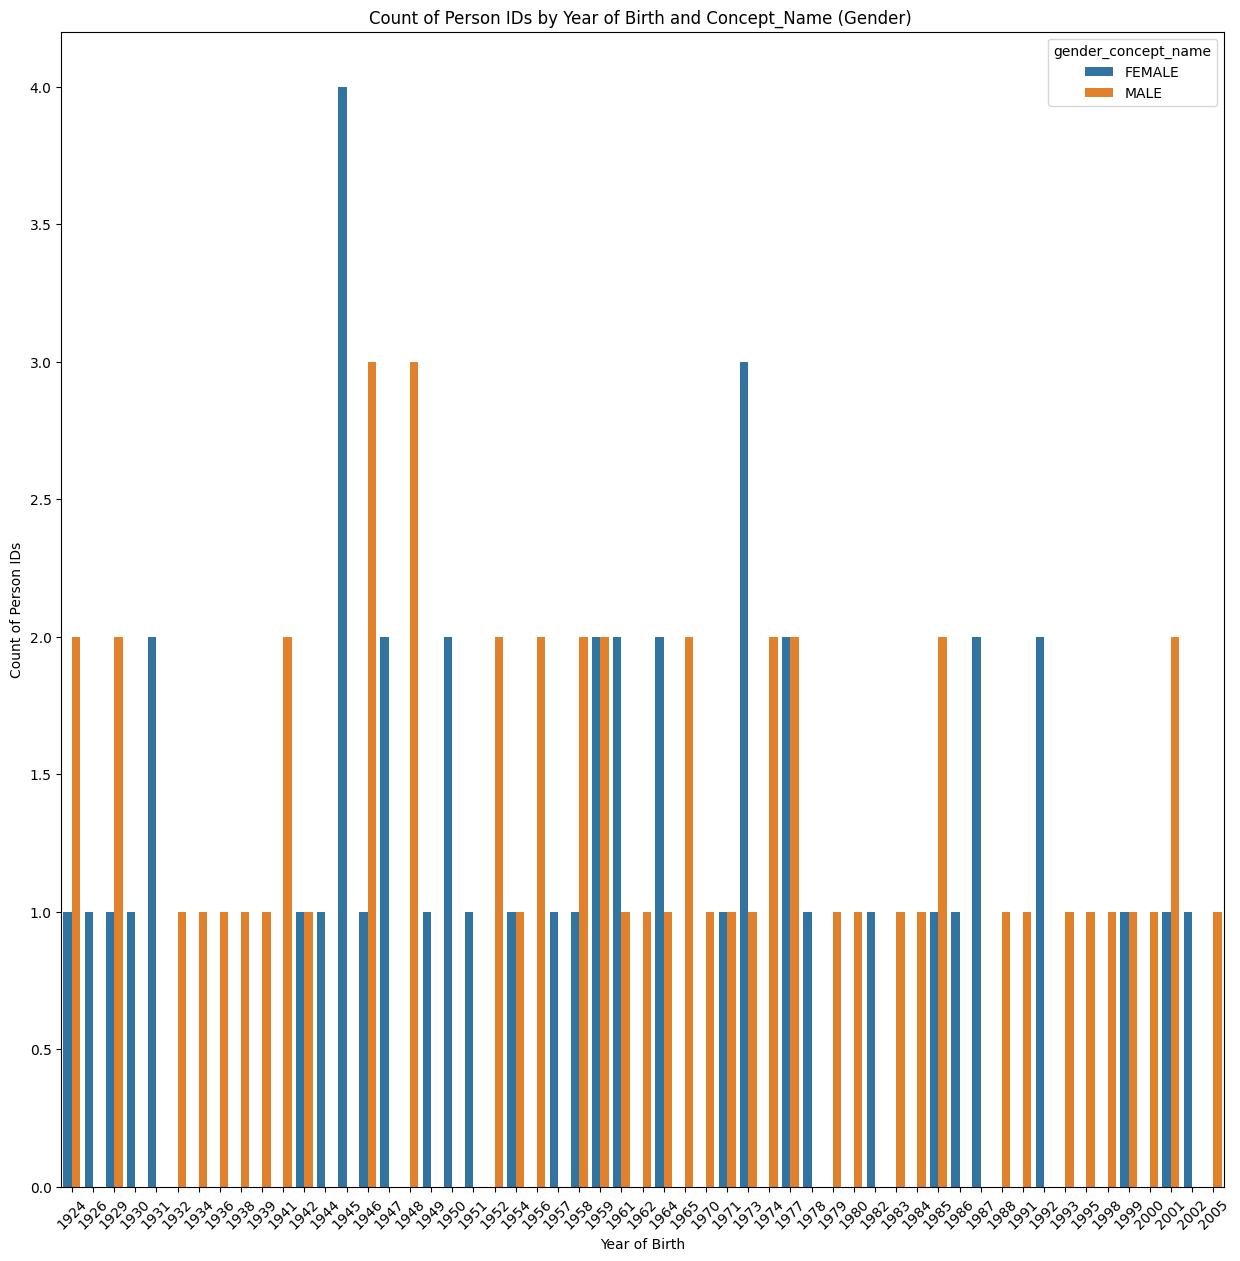

In [21]:
birth_year_gender_cnt = cdm_person_concept.groupby(['year_of_birth', 'gender_concept_name'])['person_id'].count().reset_index()

# Rename the 'person_id' column to 'count'
birth_year_gender_cnt.rename(columns={'person_id': 'count'}, inplace=True)

# Set the figure size (optional)
plt.figure(figsize=(15, 15))

# Create the plot
sns.barplot(x='year_of_birth', y='count', hue='gender_concept_name', data=birth_year_gender_cnt)

# Add title and labels
plt.title('Count of Person IDs by Year of Birth and Concept_Name (Gender) ')
plt.xlabel('Year of Birth')
plt.ylabel('Count of Person IDs')
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Looking at the measurement table
We can use the measurement_concept_name column (that was added by omop_join_name_all() above) to see which are the most common measurements.

In [23]:
cdm['measurement'].head()

,measurement_id,person_id,measurement_concept_id,measurement_date,measurement_datetime,measurement_time,measurement_type_concept_id,operator_concept_id,value_as_number,value_as_concept_id,unit_concept_id,range_low,range_high,provider_id,visit_occurrence_id,visit_detail_id,measurement_source_value,measurement_source_concept_id,unit_source_value,value_source_value
0,2448,2451,45757366,1996-06-26,1996-06-26 12:26:10.383789,NaN,32817,4172704,91,NaN,8555,NaN,NaN,NaN,2451,NaN,NaN,NaN,NaN,NaN
1,2449,2452,45773395,1985-11-07,1985-11-07 05:38:15.089986,NaN,32817,4171756,83,NaN,8496,NaN,NaN,NaN,2452,NaN,NaN,NaN,NaN,NaN
2,2450,2453,45763689,1995-02-06,1995-02-06 11:31:10.395688,NaN,32817,4171756,89,NaN,8496,NaN,NaN,NaN,2453,NaN,NaN,NaN,NaN,NaN
3,2451,2454,45773403,1974-07-18,1974-07-18 05:53:27.066081,NaN,32817,4171755,60,NaN,8648,NaN,NaN,NaN,2454,NaN,NaN,NaN,NaN,NaN
4,2452,2455,45763927,2011-06-27,2011-06-27 04:57:48.576704,NaN,32817,4171755,115,NaN,8547,NaN,NaN,NaN,2455,NaN,NaN,NaN,NaN,NaN


In [24]:
cdm_measurement_concept = pd.merge( cdm['measurement'], 
                                    cdm_concept[['concept_id', 'concept_name']],  # Only select 'concept_id' and 'concept_name'
                                    left_on='measurement_concept_id', right_on='concept_id', 
                                    how='left')
                                    
# most frequent measurement concepts
measurement_concept_cnt=cdm_measurement_concept.groupby(['concept_name'])['person_id'].count().reset_index().sort_values(by='person_id', ascending=False)

# Rename the 'concept_name' column to 'measurement_concept_name'
measurement_concept_cnt.rename(columns={'person_id': 'Count', 'concept_name': 'measurement_concept_name'}, inplace=True)

#
measurement_concept_cnt.head().reset_index()

,index,measurement_concept_name,Count
0,19,Direct site,4
1,0,12 month target weight,3
2,46,Prescription observable,3
3,20,Disabilities of the arm shoulder and hand outc...,3
4,32,Kapandji clinical opposition and reposition te...,3


# Looking at the observation table
We can use the observation_concept_name column to see which are the most common observations.

In [26]:
cdm['observation'].head()

,observation_id,person_id,observation_concept_id,observation_date,observation_datetime,observation_type_concept_id,value_as_number,value_as_string,value_as_concept_id,qualifier_concept_id,unit_concept_id,provider_id,visit_occurrence_id,visit_detail_id,observation_source_value,observation_source_concept_id,unit_source_value,qualifier_source_value
0,2443,2451,723462,2012-05-01,2012-05-01 04:27:08.24232,32816,NaN,NaN,725555,NaN,44777550,NaN,2451,NaN,NaN,710685,NaN,NaN
1,2444,2452,706011,1975-02-21,1975-02-21 18:56:45.359304,32868,NaN,NaN,715268,NaN,44777585,NaN,2452,NaN,NaN,715745,NaN,NaN
2,2445,2453,723489,1997-12-09,1997-12-09 17:25:41.461328,32809,NaN,NaN,710689,NaN,44777534,NaN,2453,NaN,NaN,713860,NaN,NaN
3,2446,2454,704996,2009-03-31,2009-03-31 17:14:09.077546,32840,NaN,NaN,715740,NaN,44777541,NaN,2454,NaN,NaN,706008,NaN,NaN
4,2447,2455,725553,2000-02-15,2000-02-15 15:37:07.272383,32849,NaN,NaN,706007,NaN,44777533,NaN,2455,NaN,NaN,723126,NaN,NaN


In [27]:
# Join the Measurement dataframe with Concept
cdm_observation_concept = pd.merge( cdm['observation'], 
                                    cdm_concept[['concept_id', 'concept_name']],  # Only select 'concept_id' and 'concept_name'
                                    left_on='observation_concept_id', right_on='concept_id', 
                                    how='left')

# most frequent measurement concepts
observation_concept_cnt=cdm_observation_concept.groupby(['concept_name'])['person_id'].count().reset_index().sort_values(by='person_id', ascending=False)

# rename the columns
observation_concept_cnt.rename(columns={'person_id': 'Count', 'concept_name': 'observation_concept_name'}, inplace=True)

observation_concept_cnt.head().reset_index()


,index,observation_concept_name,Count
0,4,Assault by unspecified gases and vapours,4
1,12,City of travel [Location],4
2,0,Advice given about 2019-nCoV (novel coronaviru...,3
3,9,COVID-19 Intubation Progress note,3
4,32,Metastasis,3


# Looking at the drug_exposure table
We can use the drug_concept_name column to see which are the most common drugs.

In [29]:
cdm['drug_exposure'].head()


,drug_exposure_id,person_id,drug_concept_id,drug_exposure_start_date,drug_exposure_start_datetime,drug_exposure_end_date,drug_exposure_end_datetime,verbatim_end_date,drug_type_concept_id,stop_reason,...,sig,route_concept_id,lot_number,provider_id,visit_occurrence_id,visit_detail_id,drug_source_value,drug_source_concept_id,route_source_value,dose_unit_source_value
0,2443,2451,44818407,2004-06-11,2004-06-11 17:28:54.399408,2009-07-12,2009-07-12 02:31:47.97656,NaN,38000180,NaN,...,NaN,4156705,NaN,NaN,2451,NaN,NaN,21183732,NaN,NaN
1,2444,2452,44818490,1981-12-14,1981-12-14 08:28:09.102107,1990-01-08,1990-01-08 15:33:59.305522,NaN,43542358,NaN,...,NaN,4167540,NaN,NaN,2452,NaN,NaN,21179371,NaN,NaN
2,2445,2453,44818425,1994-10-31,1994-10-31 17:15:46.193519,1996-06-07,1996-06-07 13:17:53.172747,NaN,32426,NaN,...,NaN,40492305,NaN,NaN,2453,NaN,NaN,21217483,NaN,NaN
3,2446,2454,44818479,1961-03-11,1961-03-11 03:31:53.289461,1987-12-02,1987-12-02 00:24:09.811676,NaN,38000177,NaN,...,NaN,40490898,NaN,NaN,2454,NaN,NaN,21182589,NaN,NaN
4,2447,2455,44818391,2003-04-13,2003-04-13 23:45:25.852554,2007-04-10,2007-04-10 10:36:16.431806,NaN,38000175,NaN,...,NaN,600817,NaN,NaN,2455,NaN,NaN,21217484,NaN,NaN


In [30]:
# Join the Drug Exposure dataframe with Concept
cdm_drug_exposure_concept = pd.merge( cdm['drug_exposure'], 
                                    cdm_concept[['concept_id', 'concept_name']],  # Only select 'concept_id' and 'concept_name'
                                    left_on='drug_concept_id', right_on='concept_id', 
                                    how='left')

# most frequent  Drug Exposure concepts
drugexposure_concept_cnt=cdm_drug_exposure_concept.groupby(['concept_name'])['person_id'].count().reset_index().sort_values(by='person_id', ascending=False)

# rename the columns
drugexposure_concept_cnt.rename(columns={'person_id': 'Count', 'concept_name': 'drug_concept_name'}, inplace=True)

drugexposure_concept_cnt.head(5).reset_index()

,index,drug_concept_name,Count
0,17,Lotus corniculatus flower volatile oil,5
1,51,thyroid (USP) 81.25 MG Oral Tablet [Nature-Thr...,4
2,32,hydrocortisone 0.5 MG/ML / lidocaine hydrochlo...,3
3,58,zinc sulfate 125 MG Effervescent Oral Tablet,3
4,55,toltrazuril,3


# Looking at the visit_occurrence table

The visit_occurrence table contains times and attributes of visits. Other tables (e.g. measurement & observation) have a visit_occurrence_id column that can be used to establish the visit that they were associated with. Visits have a start & end date, in these synthetic data the interval between them can be substantial.

In [33]:
cdm['visit_occurrence'].head()

,visit_occurrence_id,person_id,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date,visit_end_datetime,visit_type_concept_id,provider_id,care_site_id,visit_source_value,visit_source_concept_id,admitting_source_concept_id,admitting_source_value,discharge_to_concept_id,discharge_to_source_value,preceding_visit_occurrence_id
0,2451,2451,9203,1992-07-23,1992-07-23 21:20:23.786384,2015-09-09,2015-09-09 19:12:40.927984,32817,NaN,NaN,NaN,9203,8882,Adult Living Care Facility,8716,Independent Clinic,NaN
1,2452,2452,9203,1949-01-14,1949-01-14 22:11:41.996225,1991-01-29,1991-01-29 22:07:58.329809,32817,NaN,NaN,NaN,9201,8536,Home,8615,Assisted Living Facility,NaN
2,2453,2453,9203,1994-02-10,1994-02-10 23:38:17.407702,1998-04-24,1998-04-24 13:05:43.724848,32817,NaN,NaN,NaN,9203,8761,Rural Health Clinic,8977,Public Health Clinic,NaN
3,2454,2454,9203,1959-07-06,1959-07-06 05:58:55.830104,2013-01-24,2013-01-24 07:58:42.746816,32817,NaN,NaN,NaN,9201,8970,Inpatient Long-term Care,8870,Emergency Room - Hospital,NaN
4,2455,2455,9201,1973-11-01,1973-11-01 03:55:41.889028,2013-11-22,2013-11-22 17:51:41.922618,32817,NaN,NaN,NaN,9203,8546,Hospice,8536,Home,NaN


In [34]:
cdm['visit_occurrence']['visit_start_date'] = pd.to_datetime(cdm['visit_occurrence']['visit_start_date'], errors='coerce')
cdm['visit_occurrence']['visit_end_date'] = pd.to_datetime(cdm['visit_occurrence']['visit_end_date'], errors='coerce')


In [35]:
cdm['visit_occurrence'][['visit_occurrence_id','person_id','visit_concept_id','visit_type_concept_id']].head()

,visit_occurrence_id,person_id,visit_concept_id,visit_type_concept_id
0,2451,2451,9203,32817
1,2452,2452,9203,32817
2,2453,2453,9203,32817
3,2454,2454,9203,32817
4,2455,2455,9201,32817


In [36]:
cdm['visit_occurrence']['visit_start_year'] =cdm['visit_occurrence']['visit_start_date'].dt.to_period('Y')
cdm['visit_occurrence']['visit_end_year'] =cdm['visit_occurrence']['visit_end_date'].dt.to_period('Y')

In [37]:
# Join the Visit Occurance dataframe with Concept

cdm_visit_concept = pd.merge( cdm['visit_occurrence'], 
                                    cdm_concept[['concept_id', 'concept_name']],  # Only select 'concept_id' and 'concept_name'
                                    left_on='visit_concept_id', right_on='concept_id', 
                                    how='left')

# most frequent Visit Occurance concepts
visit_occurance_concept_cnt = cdm_visit_concept.groupby(['concept_name', 'visit_start_year'])['person_id'].count().reset_index().sort_values(by='visit_start_year', ascending=True)


# rename the columns
visit_occurance_concept_cnt.rename(columns={'person_id': 'Count', 'concept_name': 'visit_concept_name','visit_start_year': 'Year'}, inplace=True)

visit_occurance_concept_cnt.head()

,visit_concept_name,Year,Count
0,Emergency Room Visit,1934,1
34,Inpatient Visit,1934,1
1,Emergency Room Visit,1947,1
2,Emergency Room Visit,1949,2
3,Emergency Room Visit,1951,1


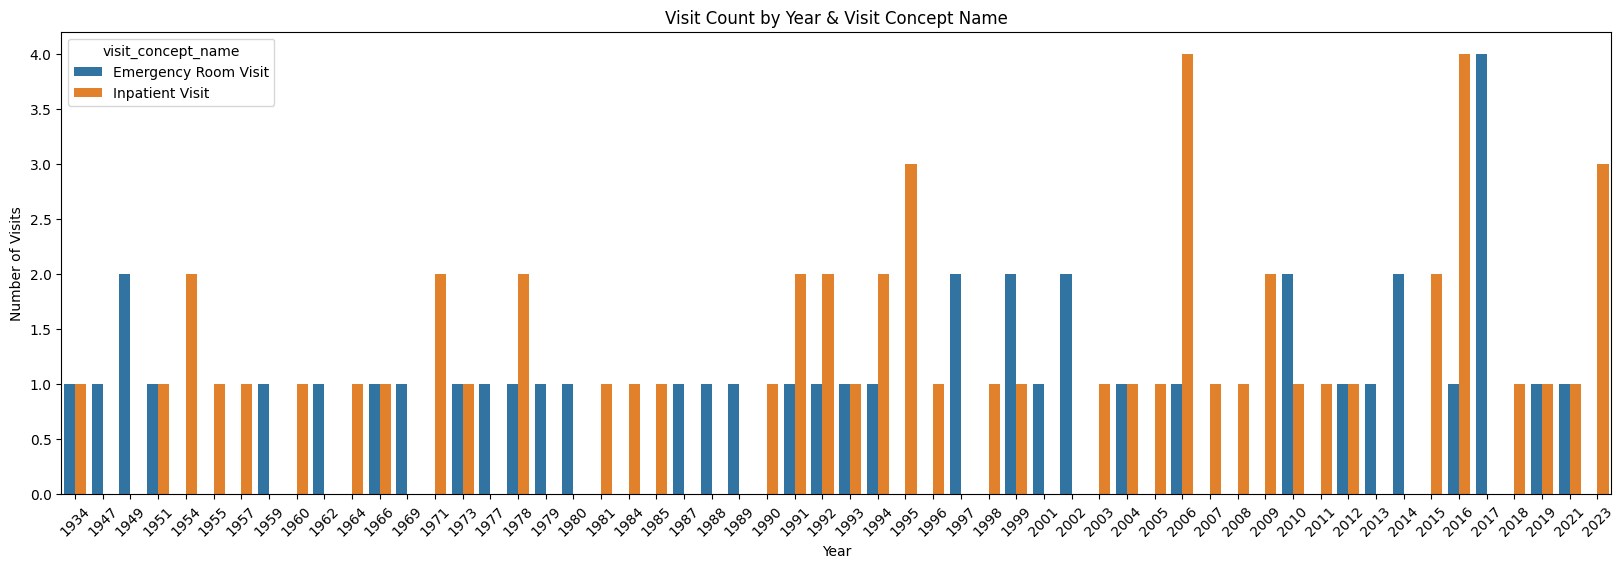

In [38]:
# Plot using seaborn
plt.figure(figsize=(20, 6))

sns.barplot(x='Year', y='Count', hue='visit_concept_name', data=visit_occurance_concept_cnt)

# Add titles and labels
plt.title('Visit Count by Year & Visit Concept Name')
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Joining person data to other tables

The OMOP common data model is person centred. Most tables have a person_id column that can be used to relate these data to other attributes of the patient. Here we show how we can join the measurement and person tables to see if there is any gender difference in measurements. A similar approach could be used to join to other tables including observation & drug_exposure.

In [41]:
joined_mp = pd.merge(cdm['person'], cdm['measurement'], 
                             on='person_id', 
                             how='inner')

In [42]:
# Step 1: Merge the 'person' and 'measurement' tables on 'person_id'
joined_mp = pd.merge(cdm['person'], cdm['measurement'], 
                     on='person_id', 
                     how='inner')

# Step 2-a: Merge the 'joined_mp' table with 'cdm_concept' to add concept names for measurement_concept_id

joined_mp = (
    joined_mp
    .merge(cdm_concept[['concept_id', 'concept_name']], 
           left_on='measurement_concept_id', 
           right_on='concept_id', 
           how='left')
)
joined_mp.rename(columns={'concept_name': 'measurement_concept_name'}, inplace=True)


 # Step 2-b:add 'gender_concept_name', you can merge with 'cdm_concept' again for 'gender_concept_id'
joined_mp = (
    joined_mp
    .merge(cdm_concept[['concept_id', 'concept_name']], 
           left_on='gender_concept_id', 
           right_on='concept_id', 
           how='left')
)
# rename columns
joined_mp.rename(columns={'concept_name': 'gender_concept_name'}, inplace=True)


# Step 3: Perform grouping, size calculation, and filtering (as per the original logic)
freq_top_measures = (
    joined_mp
    .groupby(['measurement_concept_name', 'gender_concept_name'])
    .size()  # Calculate size of each group
    .reset_index(name='n')  # Reset index and name the new column 'n'
    .sort_values(by='n', ascending=False)  # Sort by 'n' in descending order
    .query('n > 1')  # Filter to keep only rows where 'n' > 1
)

# Step 4: Display the result
freq_top_measures.head().reset_index()


,index,measurement_concept_name,gender_concept_name,n
0,28,Disabilities of the arm shoulder and hand outc...,MALE,3
1,27,Direct site,MALE,3
2,80,Urine orotic acid:creatinine ratio measurement,FEMALE,2
3,17,Detection of lymphocytes positive for CD8 antigen,MALE,2
4,1,12 month target weight,MALE,2


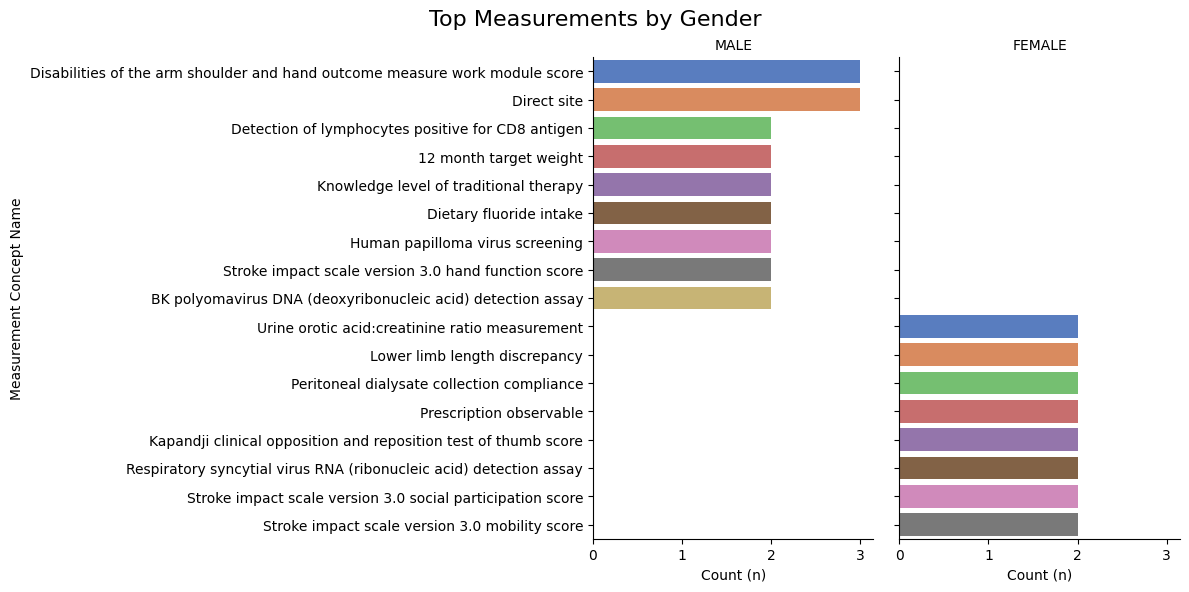

In [43]:

# Set up the FacetGrid
g = sns.FacetGrid(
    freq_top_measures,
    col="gender_concept_name",
    sharey=True,
    height=6,
    aspect=1
)

g.map_dataframe(
    sns.barplot,
    x="n",
    y="measurement_concept_name",
    hue="measurement_concept_name",
    palette="muted"
)

# Customize appearance
g.set_titles(col_template="{col_name}")  # Add titles for each gender
g.set_axis_labels("Count (n)", "Measurement Concept Name")  # Add axis labels

# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Top Measurements by Gender", fontsize=16)  # Set Graph Title

# Show plot
plt.show()


Note that we use left_join here because we only want to join on person information for rows occurring in the measurement table which is the left hand argument of the join. Also note that in this example we end up with one row per patient because the synthetic measurement table only has one row per patient. Usually we would expect multiple measurements per patient that would result in multiple rows per patient in the joined table.

# Differences between these synthetic data and real patient data
These particular synthetic data are useful to demonstrate the reading in and manipulation of OMOP data but there are some major differences between them and real patient data.

person, measurement, observation & drug_exposure tables are all same length (100 rows), in real data one would expect many more measurements, observations & drug exposures than patients
Related to 1, in these data there are a single measurement, observation and drug_exposure per patient. In reality one would expect many tens or hundreds of these other values per patient.